## Project 3 - Dynamics and entanglement in quantum and quantum-classical systems

$Kedar Mal (2022PHZ8451)$

$Mohit Kumar (2022PHZ8449)$

## Case 1 : Quantum oscillator-spin (QQ) (quantom oscillator and one photon)

The Jaynes Cummings model is a famous theoretical model in the field of quantum optics. It describes a two level atom coupled to a quantized mode of a cavity.

$H = \omega(a^{\dagger}a + \frac{1}{2}) + \frac{\omega_{s}}{2}\sigma_{z}+\frac{g}{2}(a^{\dagger}\sigma^{-}+a\sigma^{+})$

where $\omega$ is the frequency of the cavity, $\omega_{s}$
is the frequency of the atomic transition, $g$ is the coupling strength, $a$ is the annihilation operator of the cavity, and $\sigma_{\pm} = (\sigma_{x} \pm i\sigma_{y})/2$
are the raising and lowering operators of the atom. The Hamiltonian is diagonalized by the annihilation operator of the cavity, $a$ , and the raising and lowering operators of the atom,$\sigma_{\pm}$.

The annihilation and creation operators are given by

$a = \sqrt\frac{m\omega}{2}(x+\frac{ip}{m\omega})$, $a^{\dagger} = \sqrt\frac{m\omega}{2}(x-\frac{ip}{m\omega})$

In [1]:
using QuantumOptics
using Plots, LaTeXStrings
     
# Parameters
N_cutoff = 10

ω = 0.1
ωₛ = 0.1
g = 1.0

# Bases for the spin states and the cavity modes
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1 // 2)
b = b_fock ⊗ b_spin

# Operators
a = destroy(b_fock)
a_dagger = create(b_fock)
N = number(b_fock) # number operator for the cavity i.e, N = a†a

σ⁻ = sigmam(b_spin)
σ⁺ = sigmap(b_spin)
σᶻ = sigmaz(b_spin)

# Hamiltonian
H_atom = ωₛ * σᶻ / 2
H_field = ω * (N + 1/2*one(b_fock))
H_int = g * (a_dagger ⊗ σ⁻ + a ⊗ σ⁺)/ 2
H_total = one(b_fock) ⊗ H_atom + H_field ⊗ one(b_spin) + H_int

# Initial state
α = 1.0
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:100;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H_total)

# expectation values
exp_N = real(expect(N ⊗ one(b_spin), Ψt))
exp_σᶻ = real(expect(one(b_fock) ⊗ σᶻ, Ψt))
exp_σˣ = real(expect(one(b_fock) ⊗ sigmax(b_spin), Ψt))
exp_σʸ = real(expect(one(b_fock) ⊗ sigmay(b_spin), Ψt))
Sₑₙₜ = [real(entropy_vn(Ψt_)) for Ψt_ in Ψt]; # Von Neumann entropy


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Kedar\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


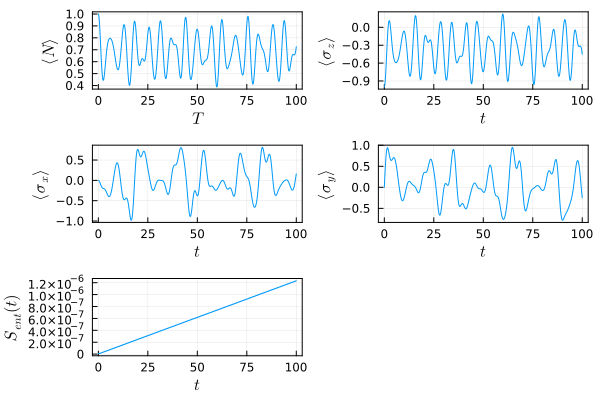

In [2]:
# Data plotting
p1 = plot(T, exp_N, xlabel = L"T", ylabel = L"\langle N \rangle", legend = false)
p2 = plot(T, exp_σᶻ, xlabel = L"t", ylabel = L"\langle \sigma_z \rangle", legend = false)
p3 = plot(T, exp_σˣ, xlabel = L"t", ylabel = L"\langle \sigma_x \rangle", legend = false)
p4 = plot(T, exp_σʸ, xlabel = L"t", ylabel = L"\langle \sigma_y \rangle", legend = false)
p5 = plot(T, Sₑₙₜ, xlabel = L"t", ylabel = L" S_{ent}( t )", legend=false,framestyle = :box)

plot(p1,p2,p3,p4,p5,layout = (3,2),framestyle = :box)

## Case 2 : Semiclassical oscillator-spin (SC) ( oscillator and two photon)

The hamiltonian of the Jaynes-Cummings model for this case is given by
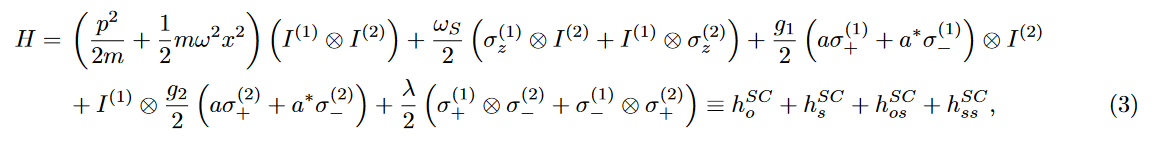

where each component is defined as for the fully quantum case. However $x$, $p$, $a$, and $a^{∗}$ are now classical variables. The $\omega$ is the frequency of the cavity, $\omega_{s}$
is the frequency of the atomic transition, $g_{1}$ and $g_{2} $ are the coupling strengths, $a$ is the annihilation operator of the cavity, and $\sigma_{\pm} = (\sigma_{x} \pm i\sigma_{y})/2$
are the raising and lowering operators of the atom. The Hamiltonian is diagonalized by the annihilation operator of the cavity, $a$ , and the raising and lowering operators of the atom,$\sigma_{\pm}$.

The first two terms in Eq. (3) are the Hamiltonians of the noninteracting oscillator and spins ($h_{o}^{SC}$ and $h_{s}^{SC}$), the second two are the interactions of the oscillator with each of the spins with coupling constants $g_{1}/2$ and $g_{2}/2$ ($h_{os}^{SC}$), and the third is the spin-spin interaction with coupling $λ/2$ ($h_{ss}^{SC}$).

The annihilation and creation operators are given by

$a = \sqrt\frac{m\omega}{2}(x+\frac{ip}{m\omega})$, $a^{*} = \sqrt\frac{m\omega}{2}(x-\frac{ip}{m\omega})$

Here, $x$ and $p$ are considered classical and the atom's spin is considered quantum. The dynamics of the systemis governed as follows: 

$H_{q} = h_{s}^{SC}+h_{os}^{SC}+h_{ss}^{SC}$, $H_{q}|\Psi> = i\frac{\delta}{\partial t}|\Psi>$
   
$H_{eff} = h_{o}^{SC} + <\Psi|H_{q}|\Psi>$

$\frac{dp}{dt} = -\frac{\partial H_{eff}}{\partial x}$,  $\frac{dx}{dt} = \frac{\partial H_{eff}}{\partial p}$

In [9]:
using Plots, LaTeXStrings,LinearAlgebra
# initial parameters
ωₛ = 2
λ = 2
g = 0.0001
g1 = g
g2 = g1
m = 1
ω = 1
x = 0.1
p = 0.0

# Integration time
Δt = 0.00001
tf = 200
T = [0:Δt:tf;]
a = x*sqrt(m*ω/2) + im*p/sqrt(2*m*ω)

# Pauli diagonal matrices
σz = [1 0;0 -1]
σ₊ = [0 1;0 0]
σ₋ = [0 0;1 0]


function Entropy(ψ)
    rho = ψ * ψ'
    entrp=0
    entrp = entrp + real((rho[1,1]+rho[2,2]) * log(complex(rho[1,1]+rho[2,2])))
    entrp = entrp + real(rho[4,4]+rho[3,3])*log(complex(rho[4,4]+rho[3,3]))
    return -1*real(entrp)
end

# hamiltonians
hₒ_SC = (p^2/(2*m)+0.5*m*ω*ω*x*x)*kron(I(2),I(2))
hₛ_SC = 0.5*ωₛ*(kron(σz,I(2)) + kron(I(2),σz))
hₒₛ_SC = kron(0.5*g1*(a * σ₊ + conj(a) * σ₋),I(2)) + kron(I(2),0.5*g2*(a * σ₊ + conj(a) * σ₋))
hₛₛ_SC = 0.5*λ*(kron(σ₊, σ₋) + kron(σ₋, σ₊))
Hq = hₛ_SC + hₒₛ_SC + hₛₛ_SC
dHq_dp = ((im/sqrt(8*m*ω))*(kron(g1*σ₊ - g1*σ₋,I(2)) + kron(I(2),g2*σ₊-g2*σ₋)))
dHq_dx = -(sqrt(m*ω/8)*(kron(g1*σ₊+g1*σ₋,I(2)) +  kron(I(2),g2 * σ₊ + g2*σ₋)))
H = hₒ_SC + Hq
ψ = [1,0,0,0] # spin up up state or up  down [0,1,0,0] or kron(u,d), where u = [1 0], u = [1 0]
# Defing intial data to be store
P = p
Q = x
Eₛₛ = real(ψ'*Hq*ψ)
Eₒ = real(ψ'*H*ψ) - Eₛₛ 
Sₑₙₜ = Entropy(ψ)


# Defining arrays to store data for time evolution
T1 = [0.0,]
Pt = [P,]
Qt = [Q,]
Eₛₛt = [Eₛₛ,]
Eₒt = [Eₒ,]
Sₑₙₜt = [Sₑₙₜ,]


for t in T[2:end]
    global ψ +=-im*Hq*ψ*Δt
    global x += Δt*(p/m + (ψ' * dHq_dp * ψ))
    global p += Δt*(-m*ω*ω*x + (ψ' * dHq_dx * ψ))
    global a = x*sqrt(m*ω/2) + im*p/sqrt(2*m*ω)
    hₒ_SC = (p^2/(2*m)+0.5*m*ω*ω*x*x)*kron(I(2),I(2))
    hₛ_SC = 0.5*ωₛ*(kron(σz,I(2)) + kron(I(2),σz))
    hₒₛ_SC = kron(0.5*g1*(a * σ₊ + conj(a) * σ₋),I(2)) + kron(I(2),0.5*g2*(a * σ₊ + conj(a) * σ₋))
    hₛₛ_SC = 0.5*λ*(kron(σ₊, σ₋) + kron(σ₋, σ₊))
    Hq = hₛ_SC + hₒₛ_SC + hₛₛ_SC
    H = hₒ_SC + Hq
    Eₛₛ = real(ψ' * Hq * ψ)
    Eₒ = real(ψ' * H * ψ) - Eₛₛ 
    Sₑₙₜ = Entropy(ψ)
  
    # storing results
    if (tf == 500 || tf == 200)
        if(t%(tf/1600) == 0) #store every 1600th trajectory point to reduce storage
            #print(t," ")
            t1 = convert(Float64,t/(tf/1600))
            #print(t1," ")
            push!(Pt, real(p))
            push!(Qt, real(x))
            push!(Eₛₛt, Eₛₛ)
            push!(Eₒt, Eₒ)
            push!(Sₑₙₜt, Sₑₙₜ)
            push!(T1, t1*(tf/1600))
        end
    else
        if(t%(tf/400) == 0) #store every 400th trajectory point to reduce storage
            #print(t," ")
            t1 = convert(Float64,t/(tf/400))
            #print(t1," ")
            push!(Pt, real(p))
            push!(Qt, real(x))
            push!(Eₛₛt, Eₛₛ)
            push!(Eₒt, Eₒ)
            push!(Sₑₙₜt, Sₑₙₜ)
            push!(T1, t1*(tf/400))
        end
    end
    
end



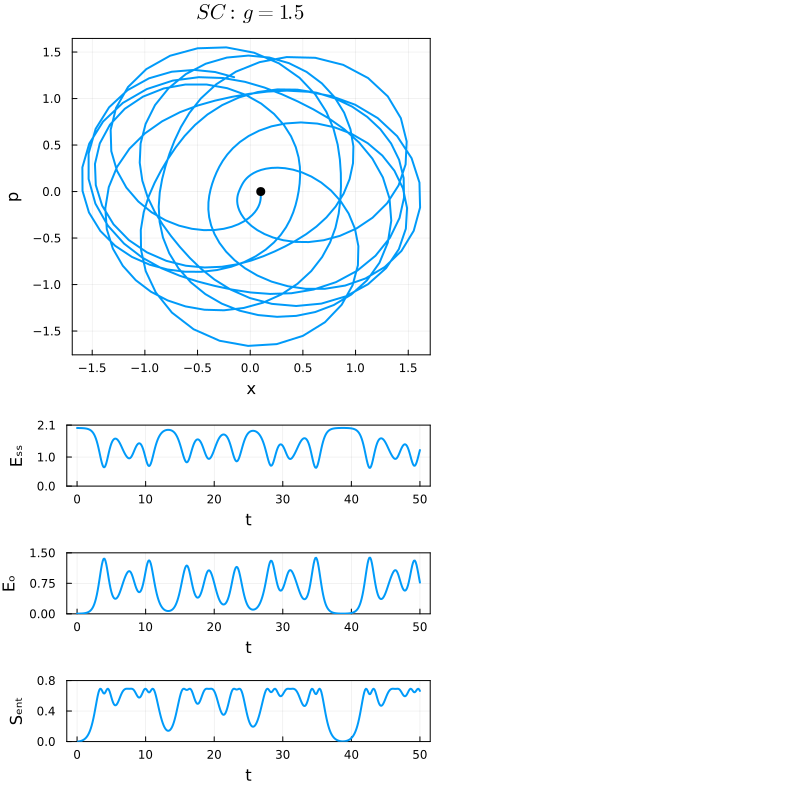

In [5]:
#Data Plotting
if g == 1.5
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qt,Pt,title = L"SC:g = %$(g)",xlabel="x",ylabel="p",label="",w=2)
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(T1,Eₛₛt,label="",ylabel="Eₛₛ",ylim=(0,2.1),yticks=[0,1,2.1],xlabel="t",w=2)
    p3 = plot(T1,Eₒt,label="",ylabel="Eₒ",ylim=(0,1.5),yticks=[0.0,0.75,1.5],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(T1,Sₑₙₜt,label="",ylabel="Sₑₙₜ",ylim=(0.0,0.8),yticks=[0.0,0.4,0.8],xlabel="t",w=2)
    plt_SC1 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("SC_g_1.5.png")
    display(plt_SC1)
end



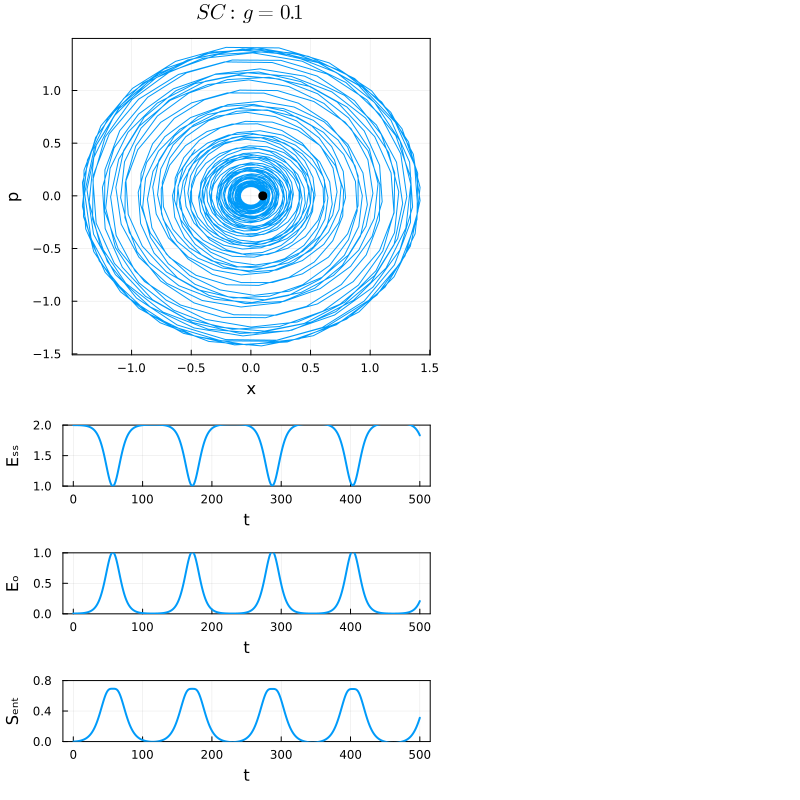

In [8]:
if g == 0.1
    #Data Plotting
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qt,Pt,title = L"SC:g = %$(g)",xlabel="x",ylabel="p",label="")
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(T1,Eₛₛt,label="",ylabel="Eₛₛ",ylim=(1,2),yticks=[1,1.5,2],xlabel="t",w=2)
    p3 = plot(T1,Eₒt,label="",ylabel="Eₒ",ylim=(0,1),yticks=[0,0.5,1],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(T1,Sₑₙₜt,label="",ylabel="Sₑₙₜ",ylim=(0,0.8),yticks=[0,0.4,0.8],xlabel="t",w=2)
    plt_SC2 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("SC_g_0.1.png")
    display(plt_SC2)
end



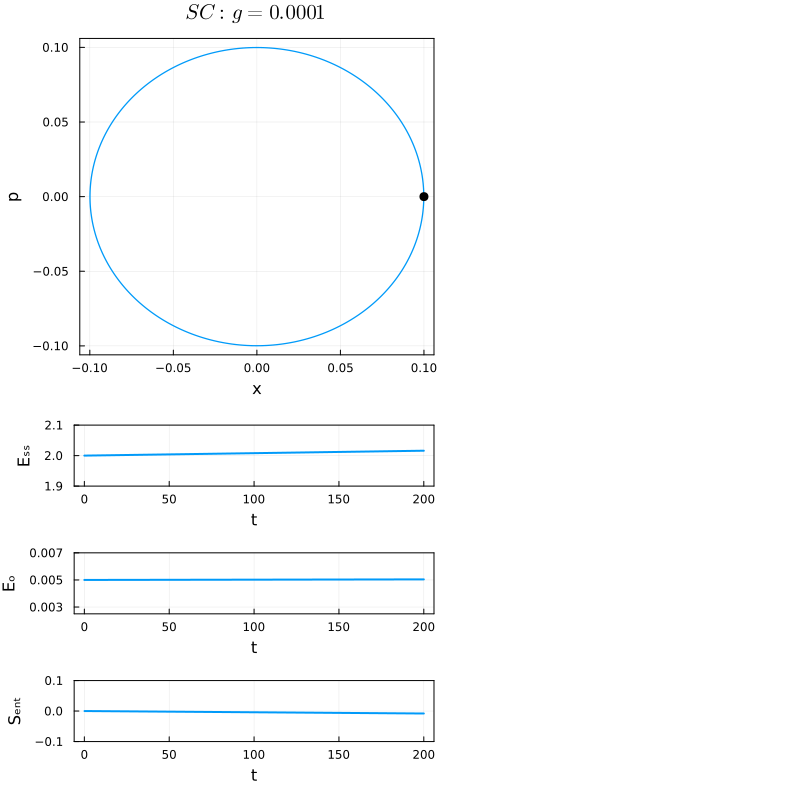

In [12]:
if g == 0.0001
    #Data Plotting
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qt,Pt,title = L"SC:g = %$(g)",xlabel="x",ylabel="p",label="")
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(T1,Eₛₛt,label="",ylabel="Eₛₛ",ylim=(1.9,2.1),yticks=[1.9,2.0,2.1],xlabel="t",w=2)
    p3 = plot(T1,Eₒt,label="",ylabel="Eₒ",ylim=(0.0025,0.007),yticks=[0.003,0.005,0.007],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(T1,Sₑₙₜt,label="",ylabel="Sₑₙₜ",ylim=(-0.1,0.1),yticks=[-0.1,0,0.1],xlabel="t",w=2)
    plt_SC3 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("SC_g_0.0001.png")
    display(plt_SC3)
end



## Case 3: Spins on classical (oscillator) background(CB) ( oscillator and two photon)

It is defined by fixing an classical oscillator “background” solution ($x_{c}(t)$, $p_{c}(t)$)
and $a_{c} = x_{c}√mω/2 + ip_{c}/√2mω$ with parameters $m$ and $ω$, and the time dependent spin Hamiltonian is given by

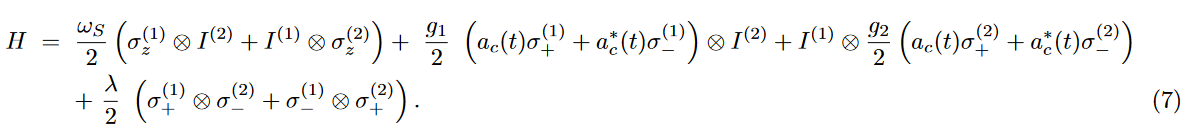

In [26]:
using Plots, LaTeXStrings,LinearAlgebra
# initial parameters
ωₛ = 2
λ = 2
g = 0.0001
g1 = g
g2 = g1
m = 1
ω = 1
x_c = 0.1
p_c = 0.0

# Integration time
Δt = 0.00001
tf = 200
T = [0:Δt:tf;]
a_c = x_c*sqrt(m*ω/2) + im*p_c/sqrt(2*m*ω)

# Pauli diagonal matrices
σz = [1 0;0 -1]
σ₊ = [0 1;0 0]
σ₋ = [0 0;1 0]
ψ = [1,0,0,0] # up up  state. [0,1,0,0] is up down state

function Entropy(ψ)
    rho = ψ * ψ'
    entrp=0
    entrp = entrp + real((rho[1,1]+rho[2,2]) * log(complex(rho[1,1]+rho[2,2])))
    entrp = entrp + real(rho[4,4]+rho[3,3])*log(complex(rho[4,4]+rho[3,3]))
    return -1*real(entrp)
end

# hamiltonians
hₒ_CB = (p_c^2/(2*m)+0.5*m*ω*ω*x_c*x_c)*kron(I(2),I(2)) # fixed value
hₛ_CB = 0.5*ωₛ*(kron(σz,I(2)) + kron(I(2),σz))
hₒₛ_CB = kron(0.5*g1*(a_c * σ₊ + conj(a_c) * σ₋),I(2)) + kron(I(2),0.5*g2*(a_c * σ₊ + conj(a_c) * σ₋))
hₛₛ_CB = 0.5*λ*(kron(σ₊, σ₋) + kron(σ₋, σ₊))
Hq = hₛ_CB + hₒₛ_CB + hₛₛ_CB
H = hₒ_CB + Hq
#dHq_dp = ((im/sqrt(8*m*ω))*(kron(g1*σ₊ - g1*σ₋,I(2)) + kron(I(2),g2*σ₊-g2*σ₋)))
#dHq_dx = -(sqrt(m*ω/8)*(kron(g1*σ₊+g1*σ₋,I(2)) +  kron(I(2),g2 * σ₊ + g2*σ₋)))


# Defing intial data to be store
P_c = p_c
Q_c = x_c
Eₛₛ = real(ψ'*Hq*ψ)
Eₒ = real(ψ'*H*ψ) - Eₛₛ 
Sₑₙₜ = Entropy(ψ)


# Defining arrays to store data for time evolution
Tcb = [0.0,]
Pcb = [P_c,]
Qcb = [Q_c,]
Eₛₛcb = [Eₛₛ,]
Eₒcb = [Eₒ,]
Sₑₙₜcb = [Sₑₙₜ,]


for t in T[2:end]
    global ψ +=-im*H*ψ*Δt
    global x_c += Δt*(p_c/m)
    global p_c += Δt*(-m*ω*ω*x_c)
    global a_c = x_c*sqrt(m*ω/2) + im*p_c/sqrt(2*m*ω)
    hₒ_CB = (p_c^2/(2*m)+0.5*m*ω*ω*x_c*x_c)*kron(I(2),I(2))
    hₛ_CB = 0.5*ωₛ*(kron(σz,I(2)) + kron(I(2),σz))
    hₒₛ_CB = kron(0.5*g1*(a_c * σ₊ + conj(a_c) * σ₋),I(2)) + kron(I(2),0.5*g2*(a_c * σ₊ + conj(a_c) * σ₋))
    hₛₛ_CB = 0.5*λ*(kron(σ₊, σ₋) + kron(σ₋, σ₊))
    Hq = hₛ_CB + hₒₛ_CB + hₛₛ_CB
    H = hₒ_CB + Hq
    
    Eₛₛ = real(ψ' * Hq * ψ)
    Eₒ = real(ψ' * H * ψ) - Eₛₛ 
    Sₑₙₜ = Entropy(ψ)
  
    # storing results
    if (tf == 500 || tf == 200)
        if(t%(tf/800) == 0) #store every 800th trajectory point to reduce storage
            #print(t," ")
            t1 = convert(Float64,t/(tf/800))
            #print(t1," ")
            push!(Pcb, real(p_c))
            push!(Qcb, real(x_c))
            push!(Eₛₛcb, Eₛₛ)
            push!(Eₒcb, Eₒ)
            push!(Sₑₙₜcb, Sₑₙₜ)
            push!(Tcb, t1*(tf/800))
        end
    else
        if(t%(tf/400) == 0) #store every 400th trajectory point to reduce storage
            #print(t," ")
            t1 = convert(Float64,t/(tf/400))
            #print(t1," ")
            push!(Pcb, real(p_c))
            push!(Qcb, real(x_c))
            push!(Eₛₛcb, Eₛₛ)
            push!(Eₒcb, Eₒ)
            push!(Sₑₙₜcb, Sₑₙₜ)
            push!(Tcb, t1*(tf/400))
        end
    end
    
end

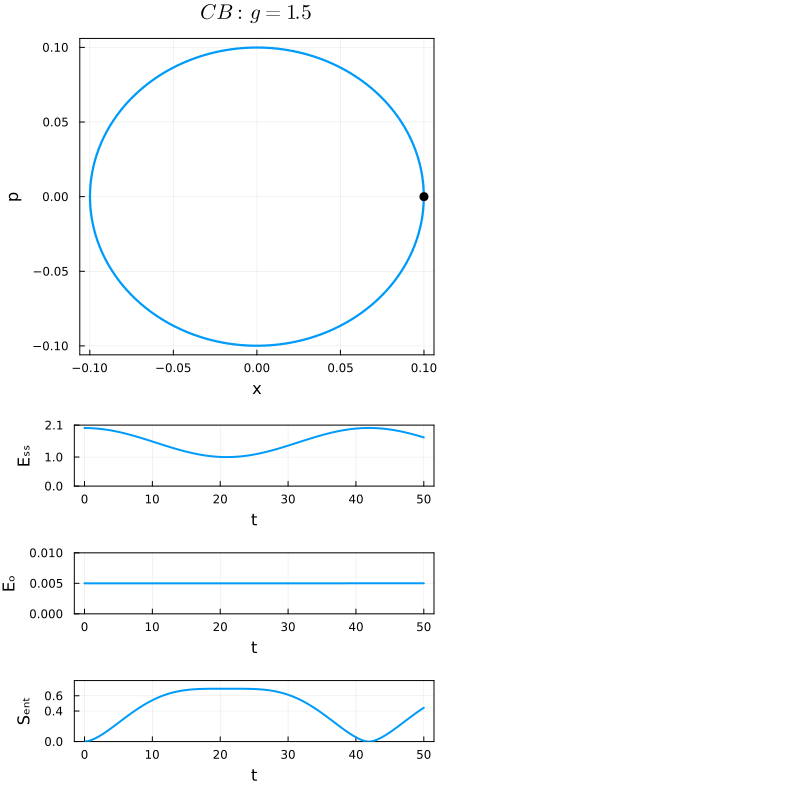

In [16]:
#Data Plotting
if g == 1.5
    #Data Plotting
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qcb,Pcb,title = L"CB:g = %$(g)",xlabel="x",ylabel="p",label="",w=2)
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(Tcb,Eₛₛcb,label="",ylabel="Eₛₛ",ylim=(0,2.1),yticks=[0,1,2.1],xlabel="t",w=2)
    p3 = plot(Tcb,Eₒcb,label="",ylabel="Eₒ",ylim=(0,0.01),yticks=[0.0,0.005,0.01],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(Tcb,Sₑₙₜcb,label="",ylabel="Sₑₙₜ",ylim=(0.0,0.8),yticks=[0.0,0.4,0.6],xlabel="t",w=2)
    plt_CB1 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("CB_g_1.5.png")
    display(plt_CB1)
end

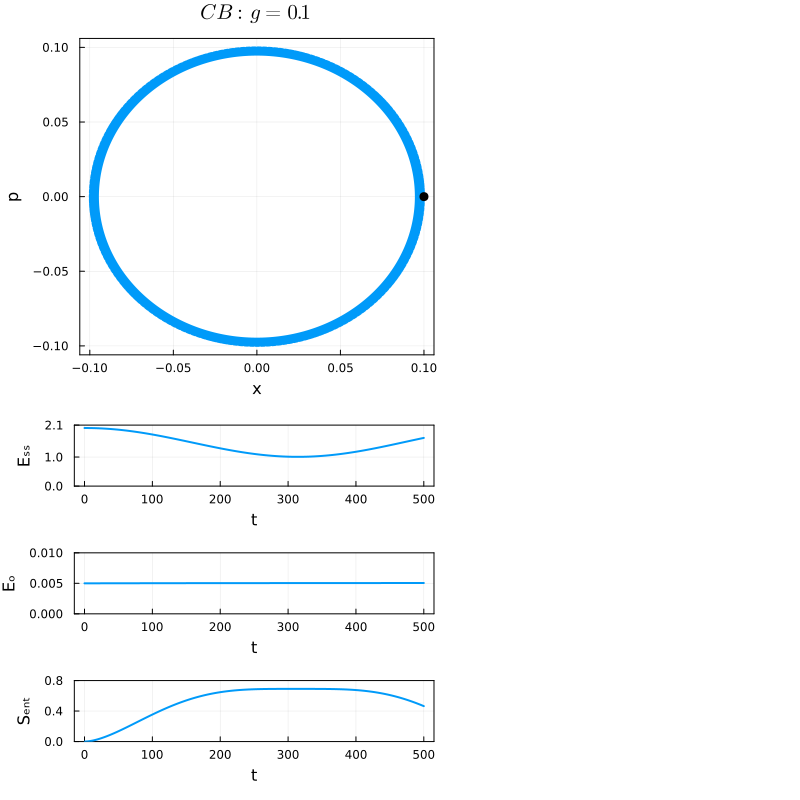

In [25]:
if g == 0.1
    #Data Plotting
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qcb,Pcb,title = L"CB:g = %$(g)",xlabel="x",ylabel="p",label="",w=2)
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(Tcb,Eₛₛcb,label="",ylabel="Eₛₛ",ylim=(0,2.1),yticks=[0,1,2.1],xlabel="t",w=2)
    p3 = plot(Tcb,Eₒcb,label="",ylabel="Eₒ",ylim=(0,0.01),yticks=[0.0,0.005,0.01],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(Tcb,Sₑₙₜcb,label="",ylabel="Sₑₙₜ",ylim=(0.0,0.8),yticks=[0.0,0.4,0.8],xlabel="t",w=2)
    plt_CB2 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("CB_g_0.1.png")
    display(plt_CB2)
end

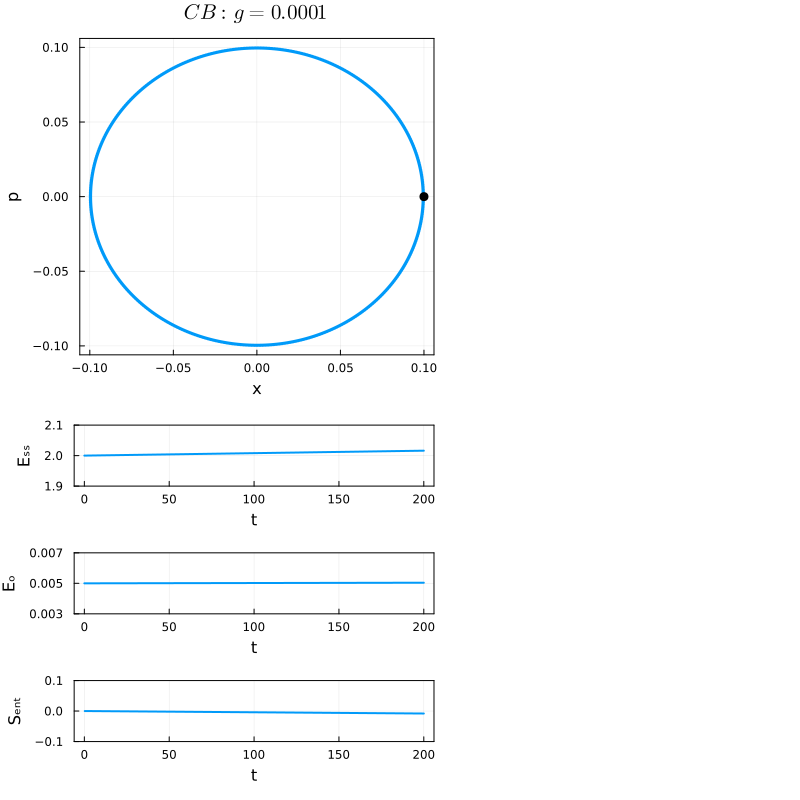

In [29]:
if g == 0.0001
    #Data Plotting
    l = @layout [a{0.5w};[grid(3,1)]]
    p1 = plot(Qcb,Pcb,title = L"CB:g = %$(g)",xlabel="x",ylabel="p",label="",w=2)
    scatter!([0.1], [0.0], color = "black", label = "", markersize = 5)
    p2 = plot(Tcb,Eₛₛcb,label="",ylabel="Eₛₛ",ylim=(1.9,2.1),yticks=[1.9,2.0,2.1],xlabel="t",w=2)
    p3 = plot(Tcb,Eₒcb,label="",ylabel="Eₒ",ylim=(0.003,0.007),yticks=[0.003,0.005,0.007],margins = 0.1Plots.mm,xlabel="t",w=2)
    p4 = plot(Tcb,Sₑₙₜcb,label="",ylabel="Sₑₙₜ",ylim=(-0.1,0.1),yticks=[-0.1,0.0,0.1],xlabel="t",w=2)
    plt_CB3 = plot(p1,p2,p3,p4,layout = l,framestyle=:box,size = (800,800))
    savefig("CB_g_0.0001.png")
    display(plt_CB3)
end


In [44]:
# Combined plots for SC and CB cases
plt1 = plot(plt_SC1,plt_CB1,layout=@layout([a{0.6w} _ b{0.6w}]))
plt2 = plot(plt_SC2,plt_CB2,layout=@layout([a{0.6w} _ b{0.6w}]))
plt3 = plot(plt_SC3,plt_CB3,layout=@layout([a{0.6w} _ b{0.6w}]))
plot(plt1,plt2,plt3,layout=(3,1),size = (1250,2200),left_margins = 15Plots.mm,bottom_margins = 0.01Plots.mm)
savefig("Combined results of SC and CB.png")


"C:\\Users\\Kedar\\Desktop\\IID_PhD\\PYL800\\Project 3\\Combined results of SC and CB.png"

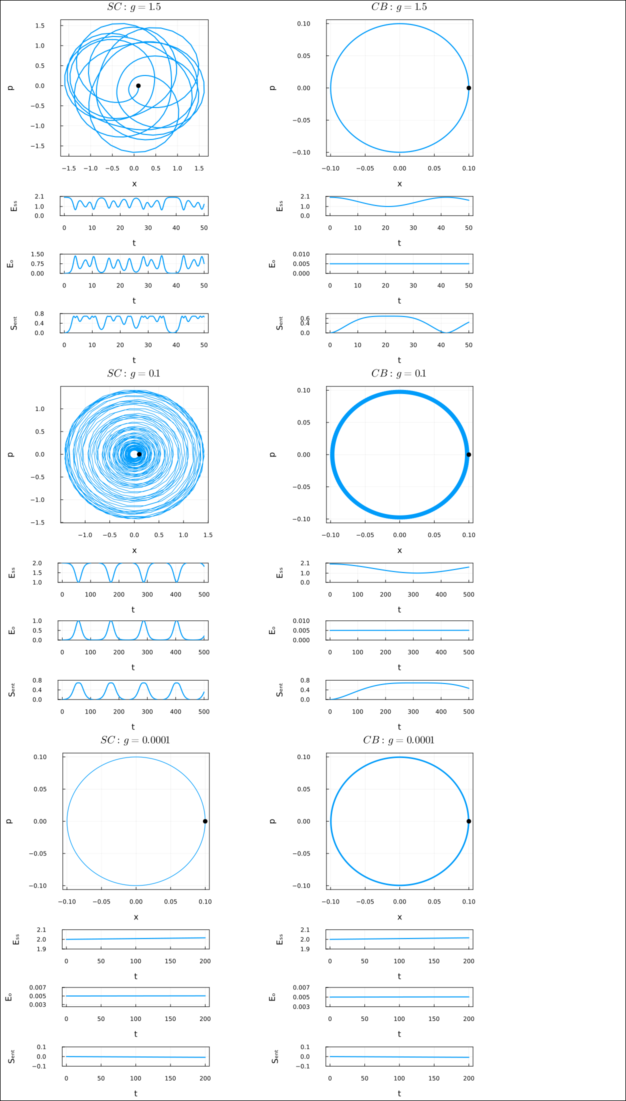

In [45]:
using Images, FileIO,ImageShow
img = load("Combined results of SC and CB.png")